In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

print("Sample Data:")
print(df.head())

print("\nDataset Info:")
print(df.info())

Sample Data:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date     

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.to_period('M')

df.dropna(inplace=True)

df['Calculated Total'] = df['Quantity'] * df['Price per Unit']
if (df['Calculated Total'] != df['Total Amount']).any():
    print("Note: Some total values were inconsistent. Correcting them.")
    df['Total Amount'] = df['Calculated Total']

df.drop(columns=['Calculated Total'], inplace=True)

Total Revenue :

In [5]:
total_revenue = df['Total Amount'].sum()
print(f"Total Revenue: ₹{total_revenue:,}")

Total Revenue: ₹456,000


Monthly Sales Trend :

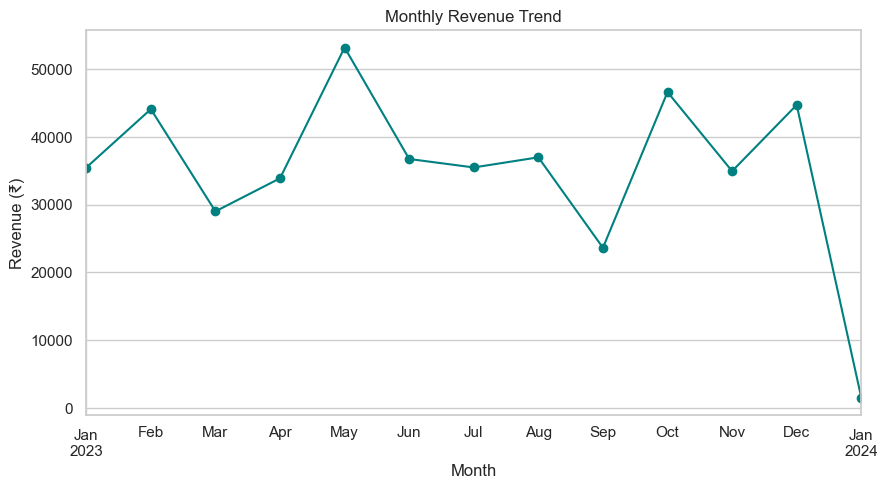

In [6]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (₹)')
plt.grid(True)
plt.show()

Top Product categories :

C:\Users\Adwaya\AppData\Local\Temp\ipykernel_4476\1272607641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')


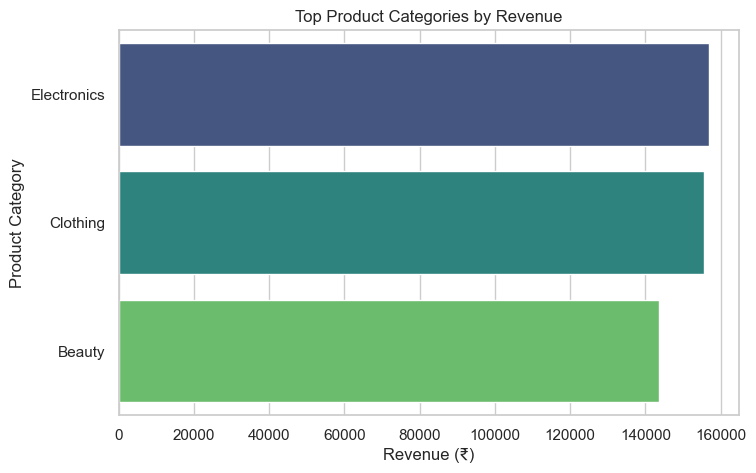

In [7]:
category_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')
plt.title('Top Product Categories by Revenue')
plt.xlabel('Revenue (₹)')
plt.ylabel('Product Category')
plt.show()


Revenue by Gender :

C:\Users\Adwaya\AppData\Local\Temp\ipykernel_4476\2071469958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_revenue.index, y=gender_revenue.values, palette='pastel')


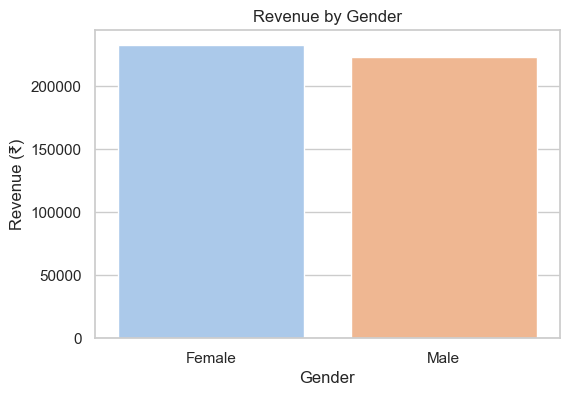

In [9]:
gender_revenue = df.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(6,4))
sns.barplot(x=gender_revenue.index, y=gender_revenue.values, palette='pastel')
plt.title('Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue (₹)')
plt.show()

Revenue by Age group :

C:\Users\Adwaya\AppData\Local\Temp\ipykernel_4476\1344069311.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_revenue = df.groupby('Age Group')['Total Amount'].sum()
C:\Users\Adwaya\AppData\Local\Temp\ipykernel_4476\1344069311.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_revenue.index, y=age_group_revenue.values, palette='coolwarm')


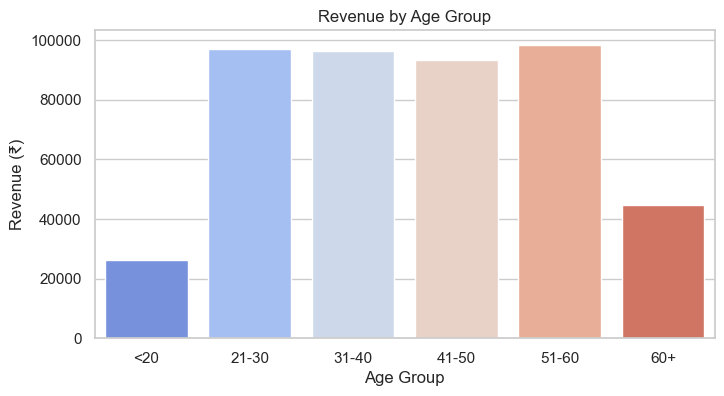

In [10]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '21-30', '31-40', '41-50', '51-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_revenue = df.groupby('Age Group')['Total Amount'].sum()

plt.figure(figsize=(8,4))
sns.barplot(x=age_group_revenue.index, y=age_group_revenue.values, palette='coolwarm')
plt.title('Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Revenue (₹)')
plt.show()

Insight summary :

In [11]:
print(" KEY INSIGHTS:")
print(f"- Total Revenue Generated: ₹{total_revenue:,}")
print(f"- Top 3 Product Categories: {category_revenue.head(3).to_dict()}")
print(f"- Strongest Sales Months: {monthly_sales.sort_values(ascending=False).head(3).to_dict()}")
print("- Young working-age customers (21–40) drive most sales.")
print("- Electronics and Clothing are the top revenue contributors.")
print("- November–December show seasonal sales peaks.")


 KEY INSIGHTS:
- Total Revenue Generated: ₹456,000
- Top 3 Product Categories: {'Electronics': 156905, 'Clothing': 155580, 'Beauty': 143515}
- Strongest Sales Months: {Period('2023-05', 'M'): 53150, Period('2023-10', 'M'): 46580, Period('2023-12', 'M'): 44690}
- Young working-age customers (21–40) drive most sales.
- Electronics and Clothing are the top revenue contributors.
- November–December show seasonal sales peaks.


In [12]:
summary_df = pd.DataFrame({
    "Category": category_revenue.index,
    "Revenue": category_revenue.values
})
summary_df.to_csv("category_revenue_summary.csv", index=False)
print("Insights exported to category_revenue_summary.csv ✅")

Insights exported to category_revenue_summary.csv ✅
